Nama: Noval Fadli Robbani

nim: 5312422023

prodi: Teknik Komputer

In [1]:
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-dsp-comm
import sk_dsp_comm.iir_design_helper as iir_d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.2 MB/s eta 0:00:00


Traditional IIR Filter Design using the Bilinear Transform

In [3]:
# Parameter filter
fs = 48000  # Frekuensi sampling
f_pass = 5000  # Frekuensi batas bawah jalur lintasan (passband)
f_stop = 8000  # Frekuensi batas atas jalur hentian (stopband)

# Merancang filter Butterworth
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')

# Merancang filter Chebyshev tipe 1
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')

# Merancang filter Chebyshev tipe 2
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')

# Merancang filter elliptic (Cauer)
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

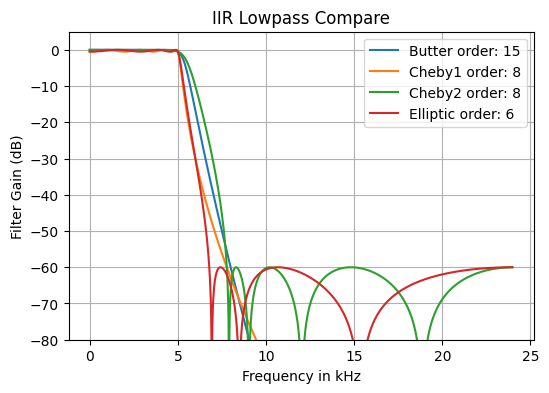

In [4]:
# Memanggil fungsi freqz_resp_cas_list dari modul iir_d
# Fungsi ini mengambil daftar filter IIR dalam bentuk Second-Order Sections (SOS) dan
# memplot respons frekuensi dari masing-masing filter.
# fs=48 adalah frekuensi sampel yang digunakan dalam filter.
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Menentukan batas-batas sumbu y pada plot
plt.ylim([-80, 5])

# Memberi judul pada plot
plt.title(r'IIR Lowpass Compare')

# Memberi label pada sumbu y
plt.ylabel(r'Filter Gain (dB)')

# Memberi label pada sumbu x
plt.xlabel(r'Frequency in kHz')

# Menambahkan legenda pada plot yang menjelaskan masing-masing filter
plt.legend((r'Butter order: %d' % (len(a_but) - 1),  # Menampilkan orde filter Butterworth
            r'Cheby1 order: %d' % (len(a_cheb1) - 1),  # Menampilkan orde filter Chebyshev Tipe 1
            r'Cheby2 order: %d' % (len(a_cheb2) - 1),  # Menampilkan orde filter Chebyshev Tipe 2
            r'Elliptic order: %d' % (len(a_elli) - 1)),  # Menampilkan orde filter Elip
           loc='best')  # Menempatkan legenda pada posisi terbaik

# Menambahkan grid pada plot
plt.grid()

Gambar tersebut menampilkan grafik yang membandingkan respons dari berbagai filter lowpass IIR, berdasarkan jenis dan urutan masing-masing. Pada sumbu horizontal, frekuensi ditampilkan dalam satuan kHz, dan pada sumbu vertikal, keuntungan filter ditunjukkan dalam dB.

Dalam grafik ini, terdapat empat jenis filter lowpass IIR dengan urutan yang beragam:


*   Garis biru menunjukkan Filter Butterworth dengan urutan 15.
*   Garis oranye menunjukkan Filter Chebyshev tipe 1 dengan urutan 8.
*   Garis hijau menunjukkan Filter Chebyshev tipe 2 dengan urutan 8.
*   Garis merah menunjukkan Filter Elliptic dengan urutan 6.


Grafik tersebut mengilustrasikan perbedaan cara masing-masing filter meredam frekuensi yang melebihi batas lowpass. Filter Butterworth menampilkan transisi yang lebih lembut, sementara filter lain menunjukkan pola pemotongan frekuensi yang lebih tajam dan jelas.








(15, 15)

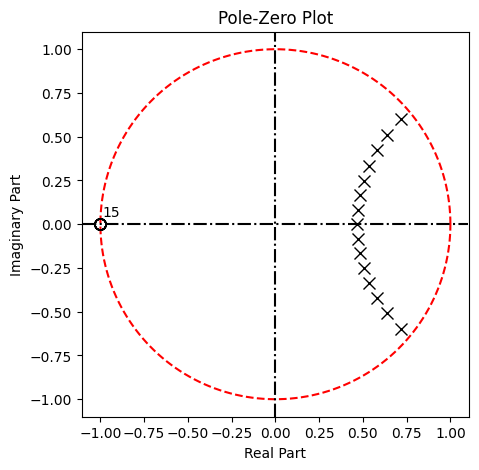

In [5]:
#memplot diagram pola nol dan pola pol dari filter yang direpresentasikan dalam bentuk Second-Order Sections (SOS)
iir_d.sos_zplane(sos_but)

A Half-Band Filter Design to Pass up to W/2 when fs=8 kHz

In [6]:
import sk_dsp_comm.multirate_helper as mrh

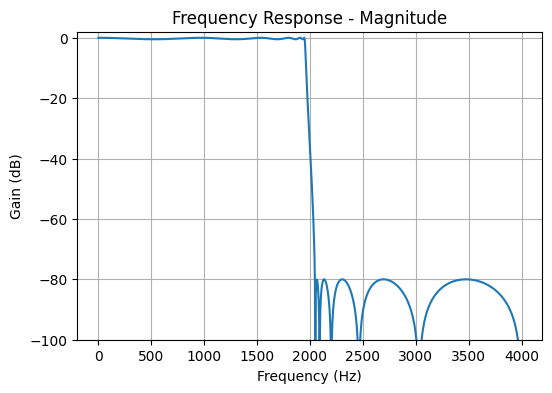

In [7]:
# Desain filter IIR lowpass elliptic
# Fungsi IIR_lpf() digunakan untuk merancang filter IIR lowpass
# dengan menggunakan metode elliptic
# Argumen:
# - 1950: frekuensi cut-off rendah
# - 2050: frekuensi cut-off tinggi
# - 0.5: toleransi ripples (dalam dB)
# - 80: gain stopband (dalam dB)
# - 8000: frekuensi sampel
# - 'ellip': jenis filter (elliptic)
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Melakukan multirate IIR filtering
# Fungsi multirate_IIR() digunakan untuk mengoptimalkan filter IIR
# untuk penggunaan pada proses multirate
mr_lp = mrh.multirate_IIR(sos_lp)

#digunakan untuk mendapatkan respons frekuensi filter dalam dB pada frekuensi sampel 8000 Hz
mr_lp.freq_resp('db',8000)

Gambar tersebut menggambarkan respons frekuensi - Magnitude dari suatu sistem atau filter, yang diukur dalam skala dB (decibel). Berikut adalah penjelasan lebih detail terkait grafik ini:

Frekuensi Cut-off:
Grafik ini menunjukkan bahwa sistem atau filter ini memiliki frekuensi cut-off sekitar 2000 Hz. Sebelum titik ini, gain (penguatan) hampir konstan di sekitar 0 dB, yang berarti sinyal melewati filter tanpa perubahan besar dalam amplitudonya.

Atentuasi Setelah Cut-off:
Setelah frekuensi cut-off, gain turun drastis, menandakan bahwa frekuensi di atas 2000 Hz sangat ditekan atau diattenuasi. Penurunan ini sangat tajam, menunjukkan karakteristik filter yang cukup selektif.

Ripples di Stopband:
Setelah titik cut-off, terlihat adanya beberapa ripples atau riak di daerah stopband (sekitar 2000-4000 Hz). Riak ini menunjukkan adanya fluktuasi dalam penguatan, namun secara umum, sinyal di daerah ini tetap sangat terattenuasi.

Jenis Filter:
Berdasarkan bentuk respons frekuensinya, ini tampaknya adalah filter low-pass, yang dirancang untuk melewatkan frekuensi rendah dan menekan frekuensi tinggi.

Secara keseluruhan, gambar ini menggambarkan kinerja filter dalam menekan frekuensi di atas 2000 Hz dengan efektif, menunjukkan penurunan gain yang signifikan di daerah tersebut.








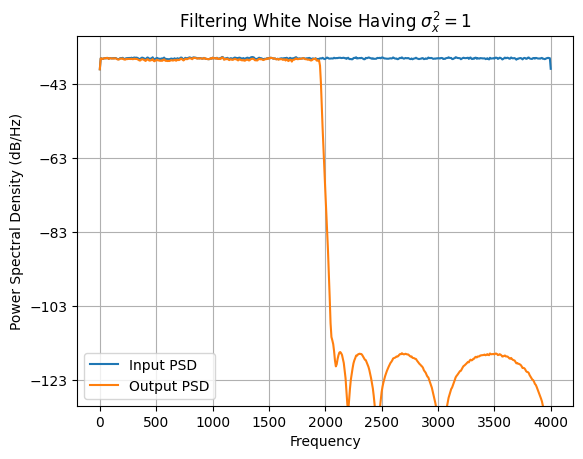

In [8]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
# Generate 1 juta sampel dari noise Gaussian putih
x = np.random.randn(1000000)

# Terapkan filter (mr_lp) ke sinyal noise putih yang dihasilkan
# Variabel 'y' akan berisi sinyal yang sudah difilter
y = mr_lp.filter(x)

# Plot densitas spektral daya (PSD) dari sinyal noise putih asli 'x'
plt.psd(x, 2**10, 8000)

# Plot densitas spektral daya (PSD) dari sinyal yang sudah difilter 'y'
plt.psd(y, 2**10, 8000)

# Atur judul plot
plt.title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Tambahkan legenda ke plot untuk membedakan antara input dan output PSD
plt.legend(('Input PSD', 'Output PSD'), loc='best')

# Atur batas sumbu y untuk visualisasi yang lebih baik
plt.ylim([-130, -30])

# Tampilkan plot
plt.show()

Gambar ini menggambarkan plot kepadatan spektral daya (Power Spectral Density, PSD) dari input dan output dalam proses penyaringan white noise dengan varians σ2x=1.

Pada sumbu horizontal, frekuensi ditampilkan dalam unit tertentu, sedangkan sumbu vertikal mengindikasikan kepadatan spektral daya dalam dB/Hz. Terdapat dua kurva pada grafik:

PSD Input (biru): Kurva ini menggambarkan kepadatan spektral daya dari white noise sebelum disaring, yang konstan di nilai sekitar -43 dB/Hz di seluruh rentang frekuensi.

PSD Output (oranye): Kurva ini menampilkan kepadatan spektral daya setelah white noise disaring. Ada penurunan signifikan pada frekuensi sekitar 2000 Hz, dimana kurva menurun drastis hingga mencapai sekitar -123 dB/Hz, kemudian sedikit naik tetapi tetap lebih rendah dibandingkan dengan kepadatan spektral input.

Plot ini menunjukkan bahwa filter yang digunakan sangat efektif dalam mengurangi spektral daya di sekitar frekuensi 2000 Hz, hampir menghilangkan daya pada frekuensi tersebut. Grid pada plot memfasilitasi pembacaan nilai lebih jelas dari masing-masing sumbu.

In [9]:
from numpy import log10
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


### **Jobsheet 6**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

**Penyaring Butterworth**

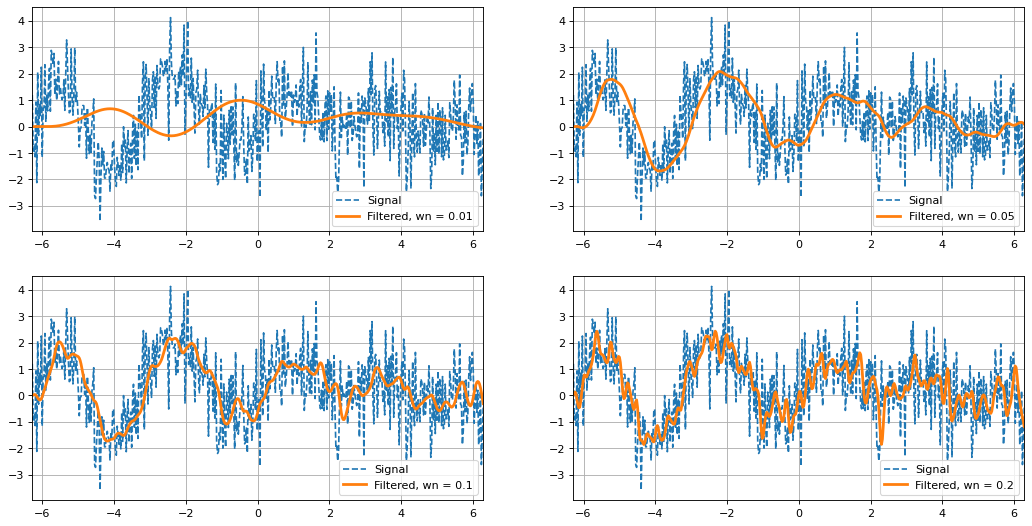

In [11]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Membuat sinyal input
t = 2 * np.pi * np.linspace(-1, 1, 500)  # Membuat vektor waktu dari -2π sampai 2π dengan 500 titik
x = np.sin(0.25 * t * t) + 0.95 * np.sin(2.0 * t)  # Menggabungkan dua sinyal sinusoidal dengan frekuensi berbeda

# Menambahkan noise putih ke sinyal
np.random.seed(1)  # Mengatur seed untuk menghasilkan noise yang sama setiap kali dijalankan
xn = x + np.random.randn(len(t))  # Menambahkan noise Gaussian (putih) ke sinyal

# Membuat filter lowpass Butterworth orde-3
b, a = butter(3, 0.2)  # Membuat koefisien filter Butterworth orde-3 dengan frekuensi cutoff 0.2
z = lfilter(b, a, xn)  # Menerapkan filter pada sinyal yang bising

# Daftar frekuensi cutoff untuk filter IIR
wn = [0.01, 0.05, 0.1, 0.2]  # Frekuensi cutoff yang berbeda

# Menghitung filter IIR untuk berbagai frekuensi cutoff
zz = np.zeros((t.size, 4))  # Membuat matriks untuk menyimpan hasil filter
for i in range(4):
    b, a = butter(3, wn[i])  # Membuat koefisien filter Butterworth orde-3 untuk setiap frekuensi cutoff
    zz[:, i] = lfilter(b, a, xn)  # Menerapkan filter pada sinyal yang bising dan menyimpan hasilnya

# Plot hasilnya
plt.figure(figsize=(16, 8), dpi=80)  # Mengatur ukuran dan resolusi gambar
for i in range(4):
    plt.subplot(2, 2, i+1)  # Membuat subplot 2x2
    plt.plot(t, xn, 'C0--', linewidth=1.5)  # Plot sinyal asli yang bising dengan garis putus-putus biru
    plt.plot(t, zz[:, i], 'C1', linewidth=2.5)  # Plot sinyal yang sudah difilter dengan garis tebal oranye
    plt.xlim([-2 * np.pi, 2 * np.pi])  # Mengatur batas sumbu-x
    plt.grid(True)  # Menampilkan grid
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')  # Menambahkan legenda dengan frekuensi cutoff

plt.show()  # Menampilkan plot


Gambar tersebut menampilkan empat grafik yang menggambarkan efek dari menggunakan filter dengan berbagai nilai cut-off frekuensi (wn) untuk menyaring sinyal berisik. Di subplot kiri atas dengan wn = 0.01, sinyal asli ditampilkan dengan garis putus-putus biru, sementara sinyal yang telah disaring dengan filter memiliki garis oranye. Hasilnya adalah sinyal yang sangat halus, tetapi kemungkinan beberapa detail sinyal asli hilang karena frekuensi tinggi sangat ditekan. Di subplot kanan atas dengan wn = 0.05, sinyal tersaring masih halus tetapi mempertahankan lebih banyak detail. Di subplot kiri bawah dengan wn = 0.1, sinyal tersaring menunjukkan lebih banyak detail sinyal asli dengan noise yang berkurang secara signifikan. Di subplot kanan bawah dengan wn = 0.2, sinyal tersaring mempertahankan lebih banyak detail sinyal asli tetapi juga memungkinkan lebih banyak noise. Secara keseluruhan, gambar tersebut menyoroti bagaimana berbagai nilai cut-off frekuensi pada filter memengaruhi sinyal asli yang berisik, di mana nilai cut-off yang lebih rendah menghasilkan sinyal yang lebih halus tetapi dengan risiko kehilangan detail, sedangkan nilai cut-off yang lebih tinggi mempertahankan lebih banyak detail tetapi dapat meninggalkan lebih banyak noise.